## Lecture 9

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
! pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv('candy-data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [6]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [9]:
df = df.drop('competitorname', axis=1)

In [12]:
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [26]:
from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
train_df = trainingSet
test_df = testSet

In [28]:
print(train_df)
train_df.count()

    chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
77          1       0        0               0       0                 0   
42          1       0        0               1       0                 0   
49          0       1        0               0       0                 0   
11          0       1        0               0       0                 0   
30          0       1        0               0       0                 0   
..        ...     ...      ...             ...     ...               ...   
20          0       1        0               0       0                 0   
60          0       1        0               0       0                 0   
71          0       0        1               0       0                 0   
14          0       1        0               0       0                 0   
51          1       0        0               1       0                 0   

    hard  bar  pluribus  sugarpercent  pricepercent  winpercent  
77     0    1        

chocolate           68
fruity              68
caramel             68
peanutyalmondy      68
nougat              68
crispedricewafer    68
hard                68
bar                 68
pluribus            68
sugarpercent        68
pricepercent        68
winpercent          68
dtype: int64

In [29]:
print(test_df)
test_df.count()

    chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
78          0       1        0               0       0                 0   
0           1       0        1               0       0                 1   
68          0       1        0               0       0                 0   
22          1       0        0               0       0                 0   
12          0       1        0               0       0                 0   
82          0       1        0               0       0                 0   
10          1       0        0               0       1                 0   
18          0       1        0               0       0                 0   
4           0       1        0               0       0                 0   
66          0       1        0               0       0                 0   
40          1       0        0               1       0                 0   
47          1       0        0               1       0                 0   
35          

chocolate           17
fruity              17
caramel             17
peanutyalmondy      17
nougat              17
crispedricewafer    17
hard                17
bar                 17
pluribus            17
sugarpercent        17
pricepercent        17
winpercent          17
dtype: int64

In [31]:
X_train = train_df.drop('chocolate', axis = 1)
y_train = train_df['chocolate']
X_test = test_df.drop('chocolate', axis = 1)
y_test = test_df['chocolate']

    

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((68, 11), (17, 11), (68,), (17,))

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(68, 11)
(17, 11)
(17,)
(68,)


In [34]:
y_train.value_counts()

chocolate
0    39
1    29
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_968\2943311726.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "chocolate", data = train_df, palette='Blues_d')


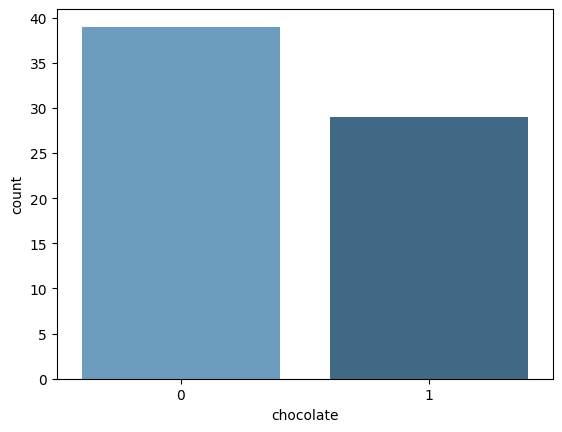

<Figure size 640x480 with 0 Axes>

In [37]:
sns.countplot(x = "chocolate", data = train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

## Model Evaluation

In [43]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8, 1],
       [1, 7]])

<Axes: >

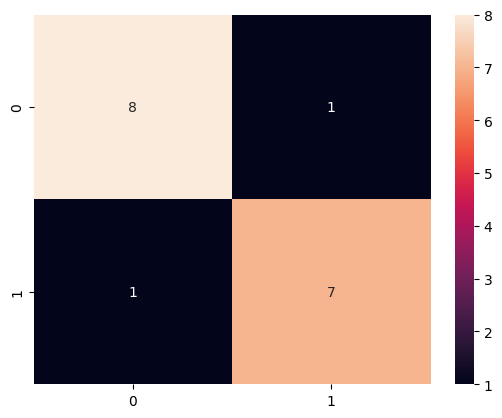

In [46]:
class_names = [0, 1]

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True)

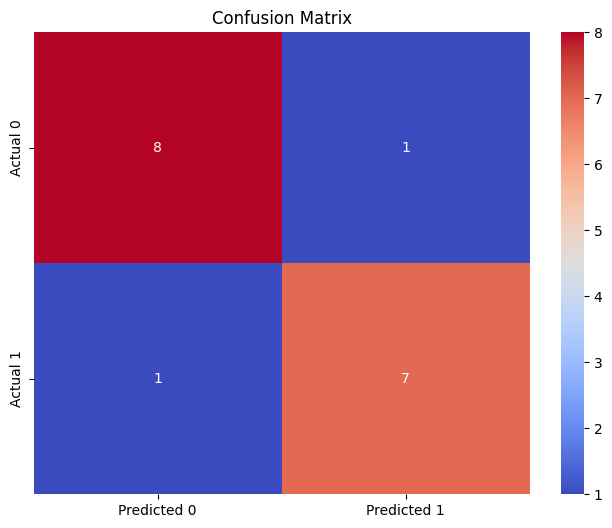

In [49]:
# Create DataFrame with proper labels
cnf_df = pd.DataFrame(cnf_matrix, 
                      index=['Actual 0', 'Actual 1'], 
                      columns=['Predicted 0', 'Predicted 1'])

plt.figure(figsize=(8, 6))
sns.heatmap(cnf_df, 
            annot=True, 
            fmt='d',
            cmap='coolwarm',
            cbar=True)
plt.title('Confusion Matrix')
plt.show()

In [48]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8823529411764706
Precision: 0.875
Recall: 0.875


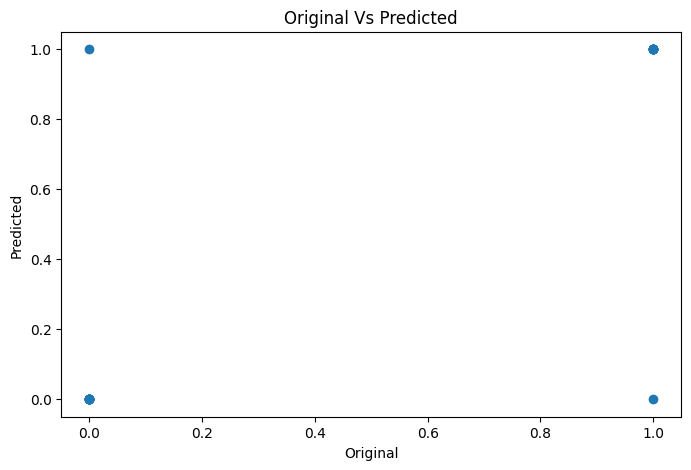

In [40]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Original Vs Predicted')
plt.show()